Your Task : Create a comprehensive visual analysis of the car sales dataset using different plotting libraries.
You will find the dataset here

Dataset Columns:

Price: Sale price of the vehicle
Years: Vehicle registration year
Brand: Car brand
Model: Car model
Color: Vehicle color
State/City: Sale location
Mileage: Miles traveled
Vin: Vehicle identification number
Title Status: Clean title or salvage insurance
Lot: Lot number
Condition: Vehicle condition

Create a histogram showing the distribution of car prices.

Create a box plot showing price distribution by brand (top 10 brands).
Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition.
Optional : create a heatmap of average prices by brand and condition.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/USA_cars_datasets.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [36]:
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['mileage'] >= lower_bound) & (df['mileage'] <= upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 2 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2310 non-null   int64  
 1   price         2310 non-null   int64  
 2   brand         2310 non-null   object 
 3   model         2310 non-null   object 
 4   year          2310 non-null   int64  
 5   title_status  2310 non-null   object 
 6   mileage       2310 non-null   float64
 7   color         2310 non-null   object 
 8   vin           2310 non-null   object 
 9   lot           2310 non-null   int64  
 10  state         2310 non-null   object 
 11  country       2310 non-null   object 
 12  condition     2310 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 252.7+ KB


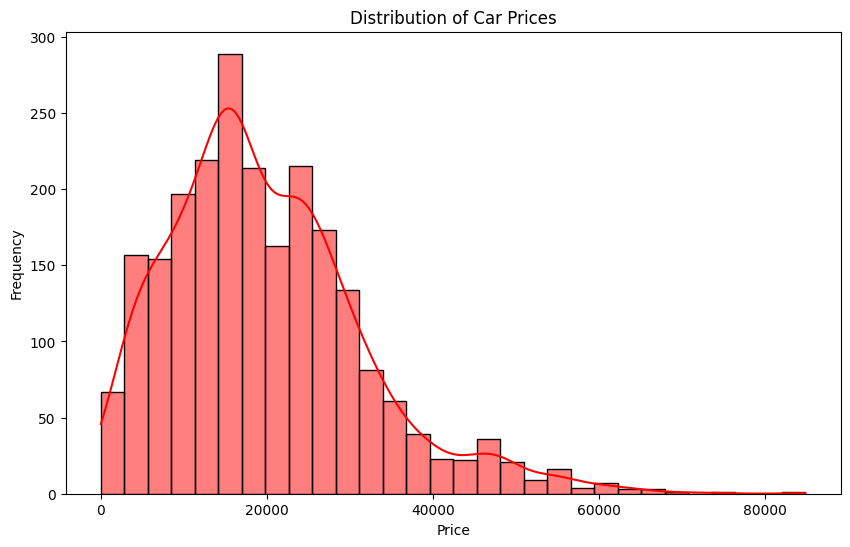

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='red')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

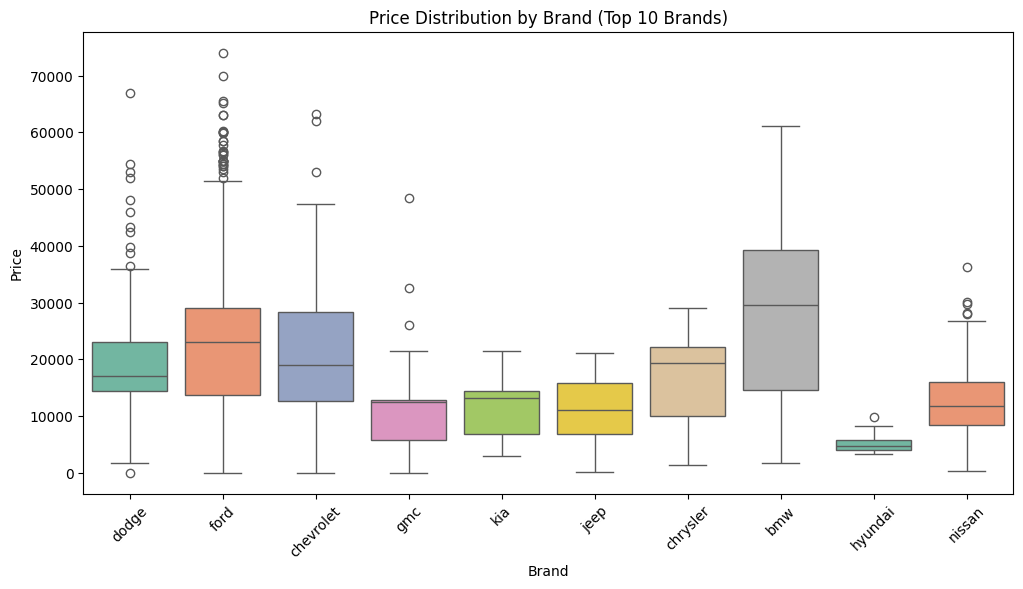

In [38]:
top_brands = df['brand'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price',  palette='Set2', hue='brand')
plt.title('Price Distribution by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [39]:
fig = px.scatter(
    df,
    x="mileage",
    y="price",
    color="condition",
    title="Price vs. Mileage (Color-coded by Condition)",
    labels={"Mileage": "Mileage (miles)", "Price": "Price ($)"},
    hover_data=["brand", "model"],
)
fig